In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

Now the mnist dataset needs to be loaded. Tuple unpacking must be done, as the dataset has already been split into testing and training data

In [4]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


To see how x_train and y_train looks like:

In [7]:
x_train.shape

(60000, 28, 28)

This means that there are 60,000 images; and each image is of 28 x 28 pixel size

In [8]:
single_image = x_train[0]

In [9]:
single_image.shape

(28, 28)

We can see that when we pick up one particular image from the dataset, its of 28 x 28 dimensions

The raw values for the image are like:

In [12]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Matplotlib has plt.imshow, which can plot this above 2-D array

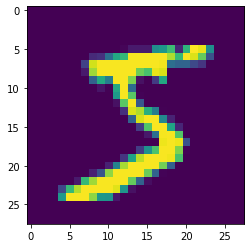

In [13]:
plt.imshow(single_image)

The number looks like '5'

MNIST dataset is grayscale(matplotlib is just showing it in a coloured way with viridis cmap), so its of 2-D, and each dimensions goes from 0 to 255

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Here the labels in y_train are literally the number that they represent. Since the first image is of 5, the y_train label for that is also 5

But all these values are categories i.e y_train is a categorical feature. So if we don't encode this, our network will assume that the values in y_train are contuinuous values and they'll start predicting values liek 5.6, 7.8 etc. which isn't desired for us

Keras has a way to convert this data into categorical variables:

In [15]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train.shape
#There is no value for number of columns in the shape, this is because they haven't been categorised yet, and are just part of 
#a single array

(60000,)

We will one-hot encode this

In [22]:
y_example = to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [23]:
y_example.shape
#Now we can see that there are now 10 different columns as the data has now been encoded.

(60000, 10)

In [24]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

We can see above that the number 1 is shown at index position 5, this is because the first number is for '5'

Now we will convert both the test and the training labels into categorical variables

In [25]:
y_cat_test = to_categorical(y_test)

In [26]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

to_categorical automatically identifies how many different columns(or classes) are to be created based on how many unique values are present in the original y_train or y_test. Suppose we wanted to add more classes by ourselves, then we can use the num_classes feature within to_categorical

In [27]:
y_cat_test = to_categorical(y_test, num_classes= 10)

In [28]:
y_cat_train = to_categorical(y_train, num_classes = 10)

We can see that our input image data has values going from 0 to 255, whereas the output is just a single number. So its important that we scale our data to similar order of magnitude

In [29]:
single_image.max()

255

In [30]:
single_image.min()

0

So we can just divide our data by 255 to scale our data and get it to being between 0 and 1(i.e single digit input, corresponding to single digit output)

And recall when we've been using that min max scalar object or any scalar from ANN, we fit to the

training data and then transform on the test data.

However,we only fit on the training data because we don't want to assume

prior knowledge of our test data.

But we have a special case here because we're dealing with images and we can make the assumption that

the future images that we're going to feed into this model that it hasn't seen yet should be scaled as

just normal images that go from the range of zero to two fifty five.

In [31]:
x_train = x_train/255

In [32]:
x_test = x_test/255

In [33]:
scaled_image = x_train[0]

In [35]:
scaled_image.max()

1.0

In [36]:
scaled_image.min()

0.0

In [37]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

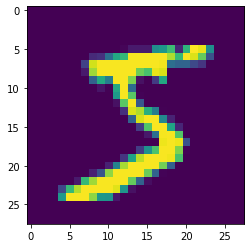

In [38]:
plt.imshow(scaled_image)

The image should be the same, as only the ratio has been changed.

In [40]:
x_train.shape

(60000, 28, 28)

We need an extra dimension to tell our CNN that we are dealing with just a single color channel(i.e black and white) and not an RGB color channel

In [43]:
x_train = x_train.reshape(60000,28,28,1)
#Essentially we have: batch_size, width, height, color_channels

In [47]:
x_test = x_test.reshape(10000,28,28,1)
#As there are 10,000 images present in x_test

### Building the Model

In [48]:
from tensorflow.keras.models import Sequential

In [50]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
#We are importing a convolutional layer, pooling layer and finally going to flatten that layer

In [52]:
model = Sequential()

#For CNN, the first layer is a convolutional layer
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation = 'relu'))
#Its very common to choose filters in powers of 2;add more filters if your dataset is more complex 
#kernel_size can be like (2,2); (4,4) etc. 
#strides have 2 dimensions as we can stride in both x and y directions.By default its (1,1) i.e going to next pixel one by one
# Types of padding: It is valid by default
#VALID: Don't apply any padding, i.e., assume that all dimensions are valid so that input image fully gets covered by filter and stride you specified.

#SAME: Apply padding to input (if needed) so that input image gets fully covered by filter and stride you specified. For stride 1, this will ensure that output image size is same as input.


There are 28 pixels for width and height, and we have chosen the kernel size to be 4. So the convolutions will be exact and there will not be any overshooting. Hence we don't need padding. 

After the convolution layer, we need a pooling layer

In [54]:
model.add(MaxPool2D(pool_size = (2,2)))

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

Now we need to flatten out our images:

In [56]:
28*28

784

We need to flatten our image into a single array of 784 points

In [57]:
model.add(Flatten())

Now we can start adding our dense layer

In [ ]:
model.add(Dense(128,activation = 'relu'))


The number of neurons should be in the same scale as 28*28 i.e between 0 and 1000

In [59]:
#Output Layer --> Multi-Class classification problem
model.add(Dense(10, activation  = 'softmax'))
#We have 10 neurons here as we have 10 possible classes or categories(0 to 9) that our data can map to finally

Now we compile our model:

In [62]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#The metrics option tells us what all extra metrics we can add to our NN

Input shape, model.add(Flatten()), model.add(Dense(10, activation  = 'softmax')) are all hyperparameters based on your data. There is a correct value for them depending on the images inputted

model.add(Conv2D(filters = 32, kernel_size = (4,4),  activation = 'relu', model.add(Dense(10, activation  = 'softmax'))These are hyperparameters that you can experiment with
    

In [64]:
from tensorflow.keras.callbacks import EarlyStopping
#This is to ensure that we don't worry about selecting the correct number of epochs.

In [65]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [67]:
model.fit(x_train, y_cat_train,epochs = 10, validation_data = (x_test, y_cat_test), callbacks = [early_stop])
#the value of epochs has been set to something huge like 10. but since we have early stopping, we don't have to worry if that's
#the right no. of epochs or not.

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1799 - accuracy: 0.9466 - val_loss: 0.0571 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0607 - accuracy: 0.9812 - val_loss: 0.0488 - val_accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.0400 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0447 - val_accuracy: 0.9861


In [68]:
metrics = pd.DataFrame(model.history.history)

In [69]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.179881,0.946567,0.057149,0.9820
1,0.060727,0.981167,0.048798,0.9830
2,0.042989,0.986733,0.039983,0.9858
3,0.032565,0.989667,0.044732,0.9861


Since we have added accuracy also to be a parameter in our compilation, hence we can plot graphs for both loss and accuracy

<AxesSubplot:>

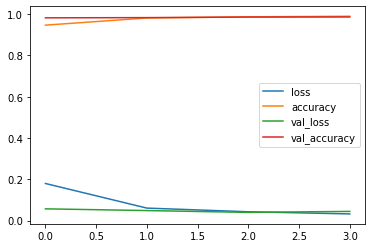

In [71]:
metrics.plot()

<AxesSubplot:>

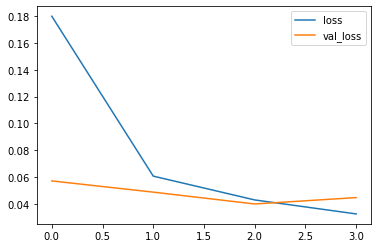

In [72]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

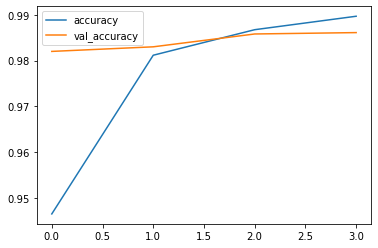

In [74]:
metrics[['accuracy', 'val_accuracy']].plot()

In [75]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0447 - accuracy: 0.9861


[0.04473160579800606, 0.9861000180244446]

The above values given are for loss and accuracy

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis=1)
#The above line is because:This was a problem of sklearn, it returns (N,3) matrix and I need to get the argmax of the matrix.

In [87]:
y_cat_test.shape

(10000, 10)

In [88]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [90]:
confusion_matrix(y_test,predictions)

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1130,    5,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0, 1026,    2,    0,    0,    0,    3,    0,    0],
       [   1,    0,    3, 1005,    0,    0,    0,    0,    1,    0],
       [   0,    0,    0,    0,  973,    0,    0,    2,    2,    5],
       [   2,    0,    0,   20,    0,  865,    1,    0,    1,    3],
       [   9,    3,    0,    2,    2,    2,  939,    0,    1,    0],
       [   0,    1,   10,    0,    0,    0,    0, 1014,    1,    2],
       [   6,    0,    3,   10,    0,    1,    0,    3,  946,    5],
       [   0,    0,    2,    4,    5,    1,    0,    8,    4,  985]],
      dtype=int64)